In [1]:
import pandas as pd

In [3]:
crime = pd.read_csv('5대+범죄+발생현황_20241105152013.csv',encoding='euc-kr')

In [4]:
property = pd.read_csv('서울시 부동산 실거래가 정보.csv')

In [5]:
business = pd.read_csv('서울시 상권분석서비스(소득소비-자치구).csv', encoding='euc-kr')

In [6]:
density = pd.read_csv("인구밀도_20241104091134.csv")

In [47]:
new_col=['자치구별(2)','소계(발생)','소계(검거)']
crime_1 = crime[new_col]
crime_1['범죄 발생 대비 검거율'] = crime['소계(검거)']/crime['소계(발생)']
result_col = ['자치구별(2)','범죄 발생 대비 검거율']
df_1 = crime_1[result_col]
df_1


C:\Users\human\AppData\Local\Temp\ipykernel_19340\409007708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_1['범죄 발생 대비 검거율'] = crime['소계(검거)']/crime['소계(발생)']


,자치구별(2),범죄 발생 대비 검거율
0,소계,0.720108
1,종로구,1.046526
2,중구,0.690003
3,용산구,0.705426
4,성동구,0.727894
5,광진구,0.690246
6,동대문구,0.685828
7,중랑구,0.742151
8,성북구,0.773008
9,강북구,0.827331


In [158]:
property_1 = property[property['건물용도']=='아파트']
new_col_1 = ['자치구명','물건금액(만원)','건물면적(㎡)']
property_2 = property_1[new_col_1]
property_2['평 수'] = property_2['건물면적(㎡)']/3.3
property_2['평당가격(만원)']= property_2['물건금액(만원)']/property_2['건물면적(㎡)']
property_3 = property_2.groupby('자치구명').mean()
result_col_1 = ['평당가격(만원)']
df_2 =property_3[result_col_1]
df_2_1 = df_2*10000
df_2_2 = df_2_1.rename(columns={'평당가격(만원)':'평당가격'})
df_2_2

C:\Users\human\AppData\Local\Temp\ipykernel_19340\4130992065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_2['평 수'] = property_2['건물면적(㎡)']/3.3
C:\Users\human\AppData\Local\Temp\ipykernel_19340\4130992065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_2['평당가격(만원)']= property_2['물건금액(만원)']/property_2['건물면적(㎡)']


,평당가격
자치구명,
강남구,2.325656e+07
강동구,1.330141e+07
강북구,9.410986e+06
강서구,1.037657e+07
관악구,1.052846e+07
광진구,1.439986e+07
구로구,8.846548e+06
금천구,1.018822e+07
노원구,1.125350e+07


In [26]:
business
year_mask = business['기준_년분기_코드'].map(lambda v : str(v)[:4] == '2022')
year_mask.sum()
year_data = business[year_mask]
year_data

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
437,20221,11170,용산구,3971498,8,216599822000,120741447000,2260224000,16326789000,4629527000,2080968000,1181653000,1943638000,18285756000,28177112000,20972708000
438,20221,11530,구로구,2994059,7,1240313685000,24183841000,1029666000,2122169000,19547307000,2995006000,3249239000,1543844000,1167706440000,2533442000,15402731000
439,20221,11545,금천구,2632285,6,59631708000,15039159000,13431140000,989689000,7332521000,3442882000,1261213000,916544000,5072073000,1880642000,10265845000
440,20221,11680,강남구,4943841,9,2336292738000,36917710000,25205260000,9928580000,151787801000,26501903000,28622019000,6613096000,1107184900000,878211630000,65319839000
441,20221,11140,중구,3513603,7,2315028971000,35356133000,5617799000,7530865000,12041069000,319639135000,25307529000,1476954000,1846069357000,38960120000,23030010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,20224,11500,강서구,3160623,7,250067694000,33305774000,6773903000,2293113000,67631062000,46769343000,5866532000,4829952000,29201467000,17089820000,36306728000
533,20224,11545,금천구,2632285,6,76909617000,16183484000,20432006000,1271043000,9020767000,4197400000,1476223000,1872979000,6750355000,2058965000,13646395000
534,20224,11230,동대문구,3030256,7,90071351000,24742273000,2816763000,1699224000,22191154000,6315507000,2596722000,2322876000,4614680000,2271677000,20500475000
535,20224,11260,중랑구,2598785,6,64444132000,18156315000,1411344000,1847407000,10510281000,4678532000,2567084000,2887733000,3633486000,2617716000,16134234000


In [ ]:
grouped_df = year_data.groupby('행정동_코드_명').mean().reset_index()
grouped_df
new_col = ['행정동_코드_명','월_평균_소득_금액','생활용품_지출_총금액','교육_지출_총금액']
grouped_df_1 = grouped_df[new_col]
df_3 = grouped_df_1
df_3

,행정동_코드_명,월_평균_소득_금액,생활용품_지출_총금액,교육_지출_총금액
0,강남구,4943841.0,9.753118e+09,3.394553e+10
1,강동구,3292857.0,1.710105e+09,5.489936e+09
2,강북구,2547460.0,1.183999e+09,1.432918e+09
3,강서구,3160623.0,2.323557e+09,5.919490e+09
4,관악구,2771927.0,1.772407e+09,1.412698e+10
5,광진구,3192971.0,1.937717e+09,2.971485e+09
6,구로구,2994059.0,2.176782e+09,3.467560e+09
7,금천구,2632285.0,1.187190e+09,1.371635e+09
8,노원구,3195375.0,1.676249e+09,7.833240e+09
9,도봉구,2785111.0,1.015555e+09,2.049020e+09


In [36]:
density

,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
0,합계,소계,소계,9667669,605.21,15974
1,합계,종로구,소계,152211,23.91,6365
2,합계,종로구,사직동,9355,1.23,7606
3,합계,종로구,삼청동,2642,1.49,1773
4,합계,종로구,부암동,9536,2.27,4201
...,...,...,...,...,...,...
447,합계,강동구,천호2동,33825,1.57,21545
448,합계,강동구,길동,45374,1.61,28183
449,합계,강동구,강일동,33057,2.26,14627
450,합계,강동구,상일1동,39178,1.82,21526


In [88]:
new_col_2= ['동별(2)','인구밀도 (명/㎢)','인구 (명)']
density_1 = density[new_col_2]
df_4 = density_1.groupby('동별(2)').mean()
df_4

,인구밀도 (명/㎢),인구 (명)
동별(2),,
강남구,16155.304348,4.644374e+04
강동구,22138.600000,4.640370e+04
강북구,23025.785714,4.252886e+04
강서구,25291.190476,5.472743e+04
관악구,28300.454545,4.556600e+04
광진구,24183.187500,4.390650e+04
구로구,25260.411765,4.922565e+04
금천구,20545.636364,4.414873e+04
노원구,22216.050000,5.080140e+04


In [139]:
import pandas as pd
traffic =pd.read_csv('교통.csv')
traffic
traffic.drop(columns=['Unnamed: 0'],inplace=True)
df_5_1 = traffic
new_col_3 = ['구','버스승차객수','지하철승차객수','마트개수','고등학교개수']
df_5 = df_5_1[new_col_3]
df_5


,구,버스승차객수,지하철승차객수,마트개수,고등학교개수
0,강남구,94376431,155533337,47,22
1,강동구,27155182,36564622,20,14
2,강북구,58432859,9001341,21,7
3,강서구,63720804,49045060,22,23
4,관악구,92702373,28063756,19,17
5,광진구,31840472,23353031,26,9
6,구로구,57108139,44684691,25,14
7,금천구,46669437,18287415,22,6
8,노원구,51409495,52859796,19,25
9,도봉구,38187812,23775519,15,9


In [159]:
df_1 = df_1.rename(columns={'자치구별(2)': '자치구명'})
df_2_2 = df_2_2.rename(columns={'자치구명': '자치구명'})
df_3 = df_3.rename(columns={'행정동_코드_명': '자치구명'})
df_4 = df_4.rename(columns={'동별(2)': '자치구명'})
#df_4 = df_4.reset_index()
df_5 = df_5.rename(columns={'구' : '자치구명'})

In [160]:
merged_df = df_1.merge(df_2_2, on='자치구명').merge(df_3, on='자치구명').merge(df_4, on='자치구명').merge(df_5, on='자치구명')

In [161]:
merged_df

,자치구명,범죄 발생 대비 검거율,평당가격,월_평균_소득_금액,생활용품_지출_총금액,교육_지출_총금액,인구밀도 (명/㎢),인구 (명),버스승차객수,지하철승차객수,마트개수,고등학교개수
0,종로구,1.046526,1.198678e+07,3725859.0,1.607569e+09,4.017572e+09,14543.222222,16912.333333,66224995,77401702,16,14
1,중구,0.690003,1.222634e+07,3513603.0,7.613716e+09,2.627210e+10,18616.750000,16348.125000,45503810,78865473,57,11
2,용산구,0.705426,2.005370e+07,3971498.0,1.568267e+10,1.311866e+09,15373.235294,27445.176471,50338521,20010296,22,10
3,성동구,0.727894,1.866927e+07,3734499.0,1.614918e+09,2.827612e+09,22131.277778,32026.000000,35118053,45692050,14,7
4,광진구,0.690246,1.439986e+07,3192971.0,1.937717e+09,2.971485e+09,24183.187500,43906.500000,31840472,23353031,26,9
5,동대문구,0.685828,1.112949e+07,3030256.0,1.734690e+09,2.504125e+09,25205.266667,47146.800000,62655773,17992368,28,11
6,중랑구,0.742151,1.000189e+07,2598785.0,1.640601e+09,2.547978e+09,23818.117647,45898.823529,49759622,17943368,13,10
7,성북구,0.773008,1.145874e+07,3281773.0,1.168155e+09,3.608064e+09,24818.857143,42093.714286,75959717,12954299,30,13
8,강북구,0.827331,9.410986e+06,2547460.0,1.183999e+09,1.432918e+09,23025.785714,42528.857143,58432859,9001341,21,7
9,도봉구,0.732835,8.951246e+06,2785111.0,1.015555e+09,2.049020e+09,25696.400000,41865.200000,38187812,23775519,15,9


In [162]:
numeric_df = merged_df.select_dtypes(include=['number']) #수치형 컬럼만 선택

corr_matrix = numeric_df.corr()
corr_matrix

,범죄 발생 대비 검거율,평당가격,월_평균_소득_금액,생활용품_지출_총금액,교육_지출_총금액,인구밀도 (명/㎢),인구 (명),버스승차객수,지하철승차객수,마트개수,고등학교개수
범죄 발생 대비 검거율,1.000000,-0.226409,-0.120465,-0.150372,-0.160538,-0.400043,-0.431231,0.055473,0.062396,-0.220215,0.052328
평당가격,-0.226409,1.000000,0.904914,0.751007,0.448575,-0.556475,-0.156458,0.264467,0.494143,0.339274,0.083696
월_평균_소득_금액,-0.120465,0.904914,1.000000,0.702729,0.564190,-0.572507,-0.222878,0.385330,0.619623,0.434518,0.195248
생활용품_지출_총금액,-0.150372,0.751007,0.702729,1.000000,0.435095,-0.697339,-0.317383,0.271618,0.324405,0.431633,0.082691
교육_지출_총금액,-0.160538,0.448575,0.564190,0.435095,1.000000,-0.305872,-0.145541,0.410564,0.709342,0.736657,0.441309
인구밀도 (명/㎢),-0.400043,-0.556475,-0.572507,-0.697339,-0.305872,1.000000,0.596217,-0.129789,-0.422241,-0.292147,0.002137
인구 (명),-0.431231,-0.156458,-0.222878,-0.317383,-0.145541,0.596217,1.000000,0.157125,-0.126559,-0.247668,0.351170
버스승차객수,0.055473,0.264467,0.385330,0.271618,0.410564,-0.129789,0.157125,1.000000,0.362005,0.239683,0.304535
지하철승차객수,0.062396,0.494143,0.619623,0.324405,0.709342,-0.422241,-0.126559,0.362005,1.000000,0.557795,0.416847
마트개수,-0.220215,0.339274,0.434518,0.431633,0.736657,-0.292147,-0.247668,0.239683,0.557795,1.000000,0.236827


In [ ]:
# ! pip install pandas seaborn matplotlib


Defaulting to user installation because normal site-packages is not writeable


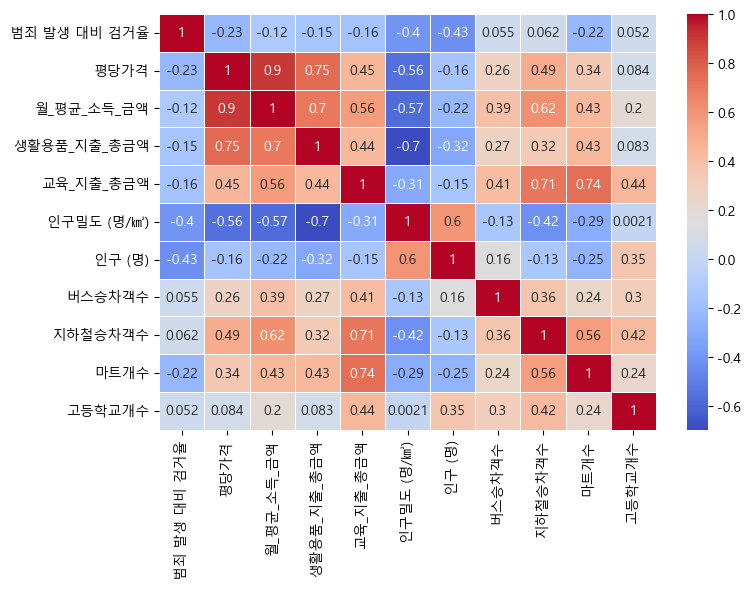

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.rcParams['font.family'] = 'Arial'  # Arial과 같은 한글 지원 폰트로 변경
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호가 깨지는 문제 해결u
plt.rc('font', family='Malgun Gothic')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()